# History

The limitations of VAEs and the advancements in noise contrastive estimation, together with some decent stroke of genius (during a pub night, as [the author attests](https://youtu.be/Z6rxFNMGdn0?t=1600)) lead to the elaborartion of the Generative Adversarial models by [Ian Goodfellow](https://en.wikipedia.org/wiki/Ian_Goodfellow) in his [seminal paper](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) in 2014.

It is safe to say, that it sparked a kind of revolution, and a huge resurgence of interest in unsupervised learning. (eg. because of huge scaling and computational advantages over deep Bolzmann machines)

"Generative adversarial networks (GANs) have become a hot research topic recently. Yann LeCun, a legend in deep learning, said in a Quora post “GANs are the most interesting idea in the last 10 years in machine learning.” There are a large number of papers related to GANs according to Google scholar. For example, there are about 11,800 papers related to GANs in 2018. That is to say, there are about 32 papers everyday and more than one paper every hour related to GANs in 2018." - States [A Review on Generative Adversarial Networks: Algorithms, Theory, and Applications](https://arxiv.org/abs/2001.06937) in early 2020.

Even in the now infrequently updated [GAN Zoo](https://github.com/hindupuravinash/the-gan-zoo), the collection of GANs with "own names" there are over 500 entries!

<img src="https://pbs.twimg.com/media/C_9S0DvUwAAkS8Z.jpg" width=55%>

(Attention, cumulative chart!)

Some, like LeCun even venture to say, that after the deep learning revolution, "the adversarial revolution" can be considered an event of it's own. 

# GAN variants

In getting an overview about the huge area of GANs, [A Review on Generative Adversarial Networks: Algorithms, Theory, and Applications](https://arxiv.org/abs/2001.06937) is a great resource. It presents key variants of the default paradigm with their contextual connections, covering:

**Different variants categorized by main properties:**

<img src="http://drive.google.com/uc?export=view&id=1cqwKFBwNvRxd0UbaNY9b43xWIEHH20JH" width=65%>

**Different variants for specific tasks and domains:**

<img src="http://drive.google.com/uc?export=view&id=1uY7NnlY5Yu5OhldIuTHZdJafhrYr0TsV" width=65%>

Just to get a flavor of the different structures
<img src="https://www.researchgate.net/profile/Kunfeng_Wang/publication/319869547/figure/fig3/AS:660911190716417@1534584915656/Computation-procedures-and-structures-of-some-GAN-variants-a-GAN-1-WGAN-31.png" width=55%>

([source](https://www.researchgate.net/publication/319869547_Generative_Adversarial_Networks_Introduction_and_Outlook))

## Main avenues of progress

It is outright impossible to detail each version of GAN that happened to be produced since 2014, but a very good summary of progress can be gained from [here](https://blog.floydhub.com/gans-story-so-far/).

An "island map" for the tour on GAN variants: 

<img src="https://paper-attachments.dropbox.com/s_D85DDA7D01FD04AEE96825C4B90F1126BC7D080CA4F2947D4A5DEC07FAD6122C_1559841150851_Map.png" width=55%>

Also a very good, more scientific summary can be found [here](https://arxiv.org/pdf/1807.04720v1.pdf), or a more recent one [here](https://arxiv.org/pdf/2001.06937.pdf).

Some of the structural variants we already discussed, or will do so later on, but one main topic was of considerable interest, that of the **different loss functions**, that allow for a more stabile training and good quality results.

### Distance metrics

One of the key areas of innovation lies in the application of theoretically well motivated "distance metrics", that provide the basis for potent lossfunctions, enabling detailed feedback and more efficient learning for GAN networks.

#### Wasserstein distance

Maybe the most widespread innovation of metrics is the application of the [Wasserstein distance](https://en.wikipedia.org/wiki/Wasserstein_metric) (also known as: Kantorovich–Rubinstein metric, earth mover's distance) introduced by the paper [Wasserstein GAN](https://arxiv.org/abs/1701.07875) or WGAN in short in 2017.

<img src="https://www.researchgate.net/profile/Soheil_Kolouri2/publication/324246144/figure/fig2/AS:612260313567233@1522985642521/The-Wasserstein-distance-for-one-dimensional-probability-distributions-p-X-and-p-Y-top.png" width=55%>

The paper claims, that:

"In this new model, we show that we can improve the stability of learning, get rid of problems like mode collapse, and provide meaningful learning curves useful for debugging and hyperparameter searches."

This is done by replacing the goal for the discriminator to simply do a binary classification over the generator's output as being fake, towards a **continuous ranking function about "realisticness"**.

Or as an [introductory blogpost](https://machinelearningmastery.com/how-to-implement-wasserstein-loss-for-generative-adversarial-networks/) (quoting the paper) puts it:

"Instead of using a discriminator to classify or predict the probability of generated images as being real or fake, the WGAN changes or replaces the discriminator model with a critic that scores the realness or fakeness of a given image.  This change is motivated by a mathematical argument that training the generator should seek a minimization of the distance between the distribution of the data observed in the training dataset and the distribution observed in generated examples. The argument contrasts different distribution distance measures, such as Kullback-Leibler (KL) divergence, Jensen-Shannon (JS) divergence, and the Earth-Mover (EM) distance, referred to as Wasserstein distance.  

_'The most fundamental difference between such distances is their impact on the convergence of sequences of probability distributions.'_

They demonstrate that a critic neural network can be trained to approximate the Wasserstein distance, and, in turn, used to effectively train a generator model.

_'… we define a form of GAN called Wasserstein-GAN that minimizes a reasonable and efficient approximation of the EM distance, and we theoretically show that the corresponding optimization problem is sound.'_

Importantly, the Wasserstein distance has the properties that it is continuous and differentiable and **continues to provide a linear gradient, even after the critic is well trained**. 

_'The fact that the EM distance is continuous and differentiable a.e. means that we can (and should) train the critic till optimality. […] the more we train the critic, the more reliable gradient of the Wasserstein we get, which is actually useful by the fact that Wasserstein is differentiable almost everywhere.'_

**This is unlike the discriminator model that, once trained, may fail to provide useful gradient information for updating the generator model.**

_'The discriminator learns very quickly to distinguish between fake and real, and as expected provides no reliable gradient information. The critic, however, can’t saturate, and converges to a linear function that gives remarkably clean gradients everywhere.'_

The benefit of the WGAN is that **the training process is more stable and less sensitive to model architecture and choice of hyperparameter configurations**.

_'… training WGANs does not require maintaining a careful balance in training of the discriminator and the generator, and does not require a careful design of the network architecture either. The mode dropping phenomenon that is typical in GANs is also drastically reduced.'_

Perhaps most importantly, the loss of the discriminator appears to relate to the quality of images created by the generator.  

Specifically, the lower the loss of the critic when evaluating generated images, the higher the expected quality of the generated images. This is important as **unlike other GANs that seek stability in terms of finding an equilibrium between two models, the WGAN seeks convergence, lowering generator loss**.  

_'To our knowledge, this is the first time in GAN literature that such a property is shown, where the loss of the GAN shows properties of convergence. This property is extremely useful when doing research in adversarial networks as one does not need to stare at the generated samples to figure out failure modes and to gain information on which models are doing better over others._"

##### Implementation details

Again, based on the blogpost above:

"
- Use a linear activation function in the output layer of the critic model (instead of sigmoid).
- Use Wasserstein loss to train the critic and generator models that promote larger difference between scores for real and generated images.
- Constrain critic model weights to a limited range after each mini batch update (e.g. [-0.01,0.01]).
- Update the critic model more times than the generator each iteration (e.g. 5).
- Use the RMSProp version of gradient descent with small learning rate and no momentum (e.g. 0.00005)." (This maybe can be changed with the advent on new optiomization methods...

And finally the loss function itself:

"The Wasserstein loss function seeks to increase the gap between the scores for real and generated images.

We can summarize the function as it is described in the paper as follows:

_Critic Loss_ = (average critic score on real images) – (average critic score on fake images)
_Generator Loss_ = -(average critic score on fake images)

Where the average scores are calculated across a mini-batch of samples."

#### Other distance metrics

Naturally, there are a multitude of other loss functions being experimented with, eg.:

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/06/Summary-of-Different-GAN-Loss-Functions.png" width=65%>

More on these [here](https://towardsdatascience.com/gan-objective-functions-gans-and-their-variations-ad77340bce3c).

### Stabilizing and enhancing training

Some early work was examining the "fragility" of the training, and some solutions, in the form of [regularization functions](https://arxiv.org/abs/1705.09367) have been proposed and widely used. 

None the less, the most successful approach came from a quasi architectural standpoint:  

#### Progressively growing GANs

One of the major steps in stabilizing the GAN training process came from the understanding, that the training of large, overparametrized networks from the "get go" is not a feasible task, it is not feasible to try to approximate high resolution images at once. Instead, in their paper, [Progressive growing of GANs for improved quality, stability and variation](https://arxiv.org/pdf/1710.10196.pdf), the researchers at NVIDIA propose a different solution, namely starting from small capacity, and gradually increasing it over the course of the training.

<img src="https://cdn-images-1.medium.com/max/1600/1*tUhgr3m54Qc80GU2BkaOiQ.gif" width=65%>

As the empirical results show: **Progressive training stabilizes GANs and speeds up the training process.**

"Most of the iterations are done at lower resolutions, and training is **2–6 times faster** with comparable image quality using other approaches. In short, it produces higher resolution images with better image quality." 

[source](https://medium.com/@jonathan_hui/gan-progressive-growing-of-gans-f9e4f91edf33)

This approach was so succefful, it became a quasi standard.

## Conditioning to the extreme

As already noted in case of VAEs, the manipulation or "conditioning" of the representations is of strong interest, because it means direct control over the generative process.

In case of ACGAN, the conditioning class label can be embedded, and the resulting vector can be easily multiplied with the noise. If this is true, and we do know, how to transform input data, for example **text into dense semantic vectors**, how about pushing this conditioning to a kind of extreme, by **generating images conditioned on a text description**. That is exactly what [StackGAN](https://arxiv.org/abs/1612.03242) did already in 2016, with remarkable results:

<img src="https://cstwiki.wtb.tue.nl/images/Group3-stackgan-fig5.png" width=65%>

(Nice introduction in [this video](https://www.youtube.com/watch?v=rAbhypxs1qQ).)

So the input here is the description, and the result is the picture, NOT the other way around, like image captioning (which is in itself quite remarkable).

## Separating style and content

Not long after the introcustion of GANs the idea of "style transfer", or "image to image translation" also appeared, that is, people tried to separate the stylistic elements of a certain (say works of art) from the content, and apply the style in a different context:

<img src="https://miro.medium.com/max/767/1*B5zSHvNBUP6gaoOtaIy4wg.jpeg" width=65%>

This technique became quite popular, but was only enabled in massive scale by a neat trick (very much in parallel with ["backtranslation"](https://arxiv.org/abs/1808.09381) in NLP) is the idea of **CycleGAN**, which **gets rid of the necessary pairing of input and output images**, instead uses a to-and-back translation approach.

<img src="https://cdn-images-1.medium.com/max/1200/1*oZsw1JaGkKPxWKKvVUWlyg.png" width=45%>

This necessiates the introduction of strong structural modifications:

<img src="https://miro.medium.com/max/2692/1*_KxtJIVtZjVaxxl-Yl1vJg.png" width=65%>

The two main innovations of CycleGAN are:

1. **Using two generator - discriminator pairs**

$F$ for mapping between domain $Y$ and $X$, and it's counterpart $D_X$, to discriminate it's output from real images coming from $X$.

$G$ for mapping between domain $X$ and $Y$, and it's counterpart $D_Y$, to discriminate it's output from real images coming from $Y$.




2. **Using "cycle consistency loss"**

Which means, enforcing the constraints:

$F(G(x)) \approx x, x \in X$

and

$G(F(y)) \approx y, y \in Y$

Or visually:

<img src="https://www.andrewszot.com/img/voice_conversion/cyclegan.png" width=65%>

The fact, that the transformation through one style transfer generator and back through the other one should result in (approximately) the original image. This ensures, that the $F$ and $G$ networks focus on style and become "counterparts" of each other.

(More on CycleGAN can be found [here](https://medium.com/@jonathan_hui/gan-cyclegan-6a50e7600d7) and [here](https://blog.floydhub.com/gans-story-so-far/), as well as a nice video illustration [here](https://www.youtube.com/watch?v=D4C1dB9UheQ).)


The maybe most extreme case of this research direction is **"pix2pix"**, which is basically image translation but on hand drawings as input:

<img src="https://pbs.twimg.com/media/DjIG9O4VAAE8-En.png" width=45%>

(Nice video about this method coming from 2017 can be found [here](https://www.youtube.com/watch?v=u7kQ5lNfUfg).)

# State-of-the-art in GANs: StyleGAN(2)

Though the search for more efficient GAN models is far from over, and there is considerable effort being undertaken in fields of objective functions and training procedures, one of the major breakthroughs in the are was presented by **radical architectural innovation** form the authors of [StyleGAN](https://arxiv.org/abs/1812.04948), and later it's refinement [StyleGAN2](https://arxiv.org/abs/1912.04958) at NVIDIA.

The main aim of this research is to capitalize on previous training procedures (like progressive growing), and to propose some theoretically motivated **radical architectural restructuring** to improve efficiency by a large margin.

The StyleGAN model amazes with the extremely realistic, high resolution (1024x1024) images it can generate, as well as the lower occurence of artefacts:

<img src="https://miro.medium.com/max/2604/1*6EyiiBQPvH5GqwdaulcCWA.png" width=55%>


## Main changes in architecture

As we can see in the illustration below, there are some important structural changes 

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Summary-of-the-StyleGAN-Generator-Model-Architecture.png" width=45%>

The discriminator was not changed in any way.


### Z vector gets non-linearly transformed and added at multiple layers

The burden of adding variance at all layers of a network from a single noise vector is quite high. Basically what the paper states is, that up till this point, some of the non linearities inside the generator network itself had the task of **generating pseudo-random projections**, so as to apply certain parts of the variance on certain levels. This was a difficult task, as well as a **cause for entanglement**.

The StyleGAN approach thus introduces a separate preprocessing subnetwork from $z$ to $w$, which can "entangle" the variability in $z$ in an appropriate manner (light skin and light hair is often correlated,...) but the original $z$ can remain pretty much linear and disentangled. The **entangled $w$ is then used with learned affine transformations $A$ at each layer to influence elements of "style"**. 

### Generator input is a constant, not noise

The above approach of generating a complex projection of $z$ to $w$, thus disentangled "conditions" for styles, and their application to individual layers makes it unnecessary to add $z$ as an input, instead the **generator network starts from a learned constant as input**. 

### Noise is added at each layer

Since now the network starts from a constant, and $z$ is used only for style based variations, the question is, how we can introduce variance on the more fine grained level, that is, to introduce something that does not change the fact that it is a male on the picture with light hair, but makes the curls realisticly varied?

<img src="https://cdn-images-1.medium.com/max/1000/1*ZfbAn45eLjFaKVx8EQdgjA.png" width=55%>

For this to be achievable, the StyleGAN architecture introduices layerwise noises, that only have localized effects to a certain level, enabling variance inside a style, instead of amongst them.

### Normalization enhances disentanglement

One of the additional goals of the architecture design is to **localize the effect** of the incoming "style" image (generated from the $z$ noise transformed by the non-linearities), so that they **only effect one layer at a time**, hence allowing for the control of certain aspects of the image, **independently from other things**.

For this the paper uses the already proposed [AdaIN layer](https://arxiv.org/abs/1703.06868).

<img src="https://miro.medium.com/max/3858/1*tmzVhW0gs0KQnSX-RDPbUg.png" width=35%>

AdaIN can be considered as a distant batchnorm variant, but it normalizes the distribution of a given layer in a way, that:

1. it first normalizes it to zero mean and unit variance
2. then it scales and shifts the distribution towards a mean and variance that is a learned projection of the processed $z$ vector (named $w$) for a specific layer. 

This latter approach means, that a learned "subset" of the "style" gets applied to a certain layer. 

Please observe, that this is only having a **local effect on the block between two AdaINs**, since the normalization at the beginning is destroying all skewedness from the previous AdaIN. This **strongly aids the disentangled usage of styles**.


## Side effect: Smooth interpolation

One of the side effects of the above mentioned disentanglement (and "linearity) of the style space is the possibility of very smooth interpolation between points in the latent space.

<img src="http://drive.google.com/uc?export=view&id=1GSVLsyvRh2V2j_MDLPMvV2RQpeT5Gaw_" width=55%>

(The full video is worth watching [here](https://www.youtube.com/watch?v=6E1_dgYlifc).) 

This indicates, that the different properties of the image (here "styles") are nicely projected into a quasi linear space, thus they "cover" a great area of plausible pictures (or alternatively, the interpolation between two of them will also be a plausible picture). 

## The improvements in StyleGAN2

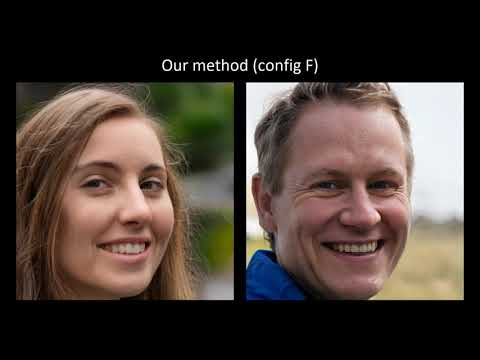

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('c-NJtV9Jvp0', width=800, height=600)



The main improvement of StyleGAN2, according to the paper itself is:

"We expose and analyze several of its characteristic artifacts, and propose changes in both model architecture and training methods to address them. In particular, we redesign generator normalization, revisit progressive growing, and regularize the generator to encourage good conditioning in the mapping from latent vectors to images. In addition to improving image quality, this path length regularizer yields the additional benefit that the generator becomes significantly easier to invert. This makes it possible to reliably detect if an image is generated by a particular network. We furthermore visualize how well the generator utilizes its output resolution, and identify a capacity problem, motivating us to train larger models for additional quality improvements. Overall, our improved model redefines the state of the art in unconditional image modeling, both in terms of existing distribution quality metrics as well as perceived image quality."

Read the paper [here](https://research.nvidia.com/publication/2019-12_Analyzing-and-Improving)!


# How to measure the "goodness" of fellow GANs?

With all these variants circulating, it is of great importance, that we find some objective measurements / metrics we can observe to evaluate the quality of the GANs and their representations. This turns out to be trickier than expected.

## Basic problem

Let's state the obvious:

Even [Salimans and Goodfellow](https://arxiv.org/abs/1606.03498) argue, that

"**Generative adversarial networks lack an objective function**, which makes it difficult to compare performance of different models."

Or to put it more precisely, the objective function for the discriminator that we measure is really ill suited to represent the "goodness" of the whole network (remember, the discriminator's loss is maximal, if the whole system works well, but can also be huge if the discriminator is a complete failure...)

Further complicating the situation is the fact, that we do not have a good measure for the representation itself, since if we would, we could omit adversarial training altogether, so we are **forced to evaluate the generated images themselves**.

There are two competing expectations towards good generated images:

- Images have to be **realistic**, that is a given image should be the closest to reality as possible
- Images have to be **diverse**, we would not like to have mode collapse, eg. only one nice picture, or even one per class



## Evaluation methods

In parallel with the development of GAN models, the evaluation criteria got also more and more sophisticated, and quite numerous ([this paper](https://arxiv.org/pdf/1802.03446.pdf) lists over 20 of them) but all of them have to meet some criteria.

Or to be more detailed, based on the paper:

"
1. favor models that generate high fidelity samples (i.e. ability to distinguish generated samples from real ones; discriminability),
2. favor models that generate diverse samples (and thus is sensitive to overfitting, mode collapse and mode drop, and can undermine trivial models such as the memory GAN),
3. favor models with disentangled latent spaces as well as space continuity (a.k.a controllable sampling),
4. have well-defined bounds (lower, upper, and chance),
5. be sensitive to image distortions and transformations. GANs are often applied to image datasets where certain transformations to the input do not change semantic meanings. Thus, an ideal measure should be invariant to such transformations. For instance, score of a generator trained on CelebA face dataset should not change much if its generated faces are shifted by a few pixels or rotated by a small angle.
6. agree with human perceptual judgments and human rankings of models, and
7. have low sample and computational complexity."

<img src="http://drive.google.com/uc?export=view&id=1dbJBxJPrOOG0trEjrF3tz6aOL7i6BExS" width=95%>


### Manual inspection

Surprisingly the baseline for evaluation in the earliest days was done pretty manually. This sounds quite suspicious, and rightly so, but bear in mind, that the earliest generative models were so radically bad, that if one could discern anything at all on the pictures, it was already a great sign of progress.

Thus said, it is quite obvious, that manual inspection is not scalable, and suffers from subjective bias from the evaluator's side, so some more robust measurements are needed.

None the less, GANs are still a field, where looking at the results carefully with your own eyes is still essential.

### Inception score

One of the most widespread metrics for GAN evaluation comes from the 2016 paper [Improved Techniques for Training GANs](https://arxiv.org/abs/1606.03498), 

"As an alternative to human annotators, we propose an automatic method to evaluate samples, which we find to correlate well with human evaluation: We apply the Inception model1 to every generated image to get the conditional label distribution $p(y|x)$. Images that contain meaningful objects should have a conditional label distribution $p(y|x)$ with low entropy. Moreover, we expect the model to generate varied images, so the marginal $\int p(y|x = G(z))dz$ should have high entropy. Combining these two requirements, the metric that we propose is: $exp(E_xKL(p(y|x)||p(y)))$, where we exponentiate results so the values are easier to compare."

Or with other words: The authors **use a pre-trained Inception model (from [here](https://arxiv.org/abs/1512.00567)) to produce predictions over the generated images, and use the predicted class distribution for evaluation of quality**.

A "good" generated image has low entorpy:

<img src="https://miro.medium.com/max/2976/1*X29oOi1Tzch2j6MuG9XS1Q.png" width=55%>

While a not so good one has higher:

<img src="https://miro.medium.com/max/2812/1*t8lE_W4UKQ8jKgzxCAbHTA.png" width=55%>

Remember, Inception fires on known objects, so if there is a known realistic object on the image, entropy has to be low.

This metric correlated well with human judgement, and was deemed plausible.

The only drawback was, that though some thought was given to diversity, Inception Score is still gamed by the system, if it only produces just one image from every class.

### Fréchet Inception Distance

To mitigate the shortcoming of IS, and to further approach human judgement, Fréchet Inception Score was proposed.

As the [post](https://machinelearningmastery.com/how-to-evaluate-generative-adversarial-networks/) elaborates:

"The Frechet Inception Distance, or FID, score was proposed and used by Martin Heusel, et al. in their 2017 paper titled [“GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium.”](https://arxiv.org/abs/1706.08500) The score was proposed as an improvement over the existing Inception Score.

FID performs well in terms of discriminability, robustness and computational efficiency. […] It has been shown that FID is consistent with human judgments and is more robust to noise than IS.

— Pros and Cons of GAN Evaluation Measures, 2018.

Like the inception score, the FID score uses the inception v3 model. Specifically, the coding layer of the model (the last pooling layer prior to the output classification of images) is used to capture computer vision specific features of an input image. These activations are calculated for a collection of real and generated images.

The activations for each real and generated image are summarized as a multivariate Gaussian and the distance between these two distributions is then calculated using the Frechet distance, also called the Wasserstein-2 distance.

A lower FID score indicates more realistic images that match the statistical properties of real images."

Though as stated above, a great variety of metrics exist, these are some very widespread baselines to use.

# Connections to reinforcement learning

It is well worth noting, that a kind of "cross pollination" exists between the field of GANs and Reinforcement Learning. 

From the GAN perspective, the competing agent's play is in a sense a game scenario, so it only took so much time, till people tried to use explicit reinforcement learning techniques to facilitate GAN training, like in the case of [SeqGAN: Sequence Generative Adversarial Nets with Policy Gradient](https://arxiv.org/abs/1609.05473), **not incidentally to a natural language generation task** (we will talk about this topic later in detail).

<img src="https://miro.medium.com/max/1800/0*FUwClIx3rko7vbFG" width=55%>


On the other hand, from the reinforcement learning side, the concepts of self play and especially actor-critic approaches have some resemblance to the Adversarial setting. (More on this later on again.)

<img src="https://www.researchgate.net/publication/335242067/figure/fig1/AS:793659691778048@1566234624454/Actor-critic-RL-architecture.png" width=35%>



# Some GAN additional areas of interest and application:

Some GAN applications: https://medium.com/@jonathan_hui/gan-some-cool-applications-of-gans-4c9ecca35900 

What are GANs good for:
https://github.com/LiDan456/MAD-GANs 

Example "Taylor GAN":
https://www.profillic.com/paper/arxiv:2001.06427 

Example: "Film restoration":
https://www.youtube.com/watch?v=EjVzjxihGvU&feature=em-uploademail 

Semi supervised learning with GANs https://arxiv.org/abs/1606.03498 ("MNIST on 100 examples")

Privacy with GANs https://www.biorxiv.org/content/10.1101/159756v4

Domain adversarial training https://arxiv.org/abs/1505.07818

Goodfellow's AAAI talk about adversarial training in general. https://www.youtube.com/watch?v=AJJRWFVfNPg

The list could be continiued, as well as the research...